In [1]:
import faceted
import matplotlib as mpl

import plotting
import utils

In [2]:
plotting.configure_style()

In [3]:
MODELS = [f"ACE2-SOM-multi-climate-RS{n}" for n in range(4)] + [f"ACE2-SOM-increasing-co2-RS{n}" for n in range(4)]
NETCDF = "annual_diagnostics.nc"

catalog = utils.open_catalog()
cases = catalog[catalog["model"].isin(MODELS) & (catalog["forcing"] == "increasing-CO2")]

In [4]:
datasets = {}
for _, case in cases.iterrows():
    model = case["model"]
    beaker_id = case["beaker_id"]
    datasets[model] = utils.open_beaker_dataset(beaker_id, NETCDF)
ds = utils.dict_to_dataset(datasets, "model")
ds = ds.squeeze("sample")

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [5]:
equilibrium_colors = mpl.colors.LinearSegmentedColormap.from_list("equilibrium-trained", ["#FFFFFF", "C0"], N=5)
increasing_colors = mpl.colors.LinearSegmentedColormap.from_list("increasing-trained", ["#FFFFFF", "C2"], N=5)

In [6]:
equilibrium_best_seed = equilibrium_colors(5 / 5)
equilibrium_other_seeds = [equilibrium_colors(i / 5) for i in range(1, 5)]

increasing_best_seed = increasing_colors(5 / 5)
increasing_other_seeds = [increasing_colors(i / 5) for i in range(1, 5)]

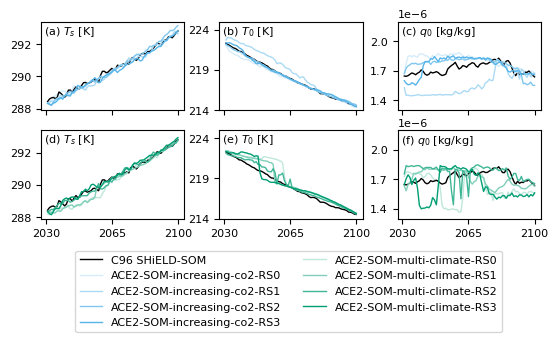

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = faceted.faceted(
    2,
    3,
    width=5.5,
    aspect=0.618,
    internal_pad=(0.35, 0.2),
    left_pad=0.4,
    right_pad=0.1,
    top_pad=0.2,
    bottom_pad=1.2,
    sharey="col"
)

BEST_EQUILIBRIUM_MODEL = "ACE2-SOM-multi-climate-RS3"
BEST_INCREASING_MODEL = "ACE2-SOM-increasing-co2-RS2"
LW = 1
LS = "-"

handles = {}

for ts_ax, t0_ax, q0_ax in [(ax1, ax2, ax3), (ax4, ax5, ax6)]:
    p, = ds.surface_temperature.sel(source="target").isel(model=0).plot(ax=ts_ax, color="k", label="C96 SHiELD-SOM", lw=LW, ls=LS)
    p, = ds.air_temperature_0.sel(source="target").isel(model=0).plot(ax=t0_ax, color="k", label="C96 SHiELD-SOM", lw=LW, ls=LS)
    p, = ds.specific_total_water_0.sel(source="target").isel(model=0).plot(ax=q0_ax, color="k", label="C96 SHiELD-SOM", lw=LW, ls=LS)

handles["C96 SHiELD-SOM"] = p

i = 0
for model in ds.model.isel(model=slice(4, None)):
    if model.item() == BEST_EQUILIBRIUM_MODEL:
        color = equilibrium_best_seed
        zorder = 4
        label = f"{model.item()} (best)"
    else:
        color = equilibrium_other_seeds[i]
        zorder = i + 1
        label = model.item()
        i += 1
    
    p, = ds.surface_temperature.sel(source="prediction", model=model).plot(ax=ax1, color=color, label=label, lw=LW, ls=LS, zorder=zorder)
    p, = ds.air_temperature_0.sel(source="prediction", model=model).plot(ax=ax2, color=color, label=label, lw=LW, ls=LS, zorder=zorder)
    p, = ds.specific_total_water_0.sel(source="prediction", model=model).plot(ax=ax3, color=color, label=label, lw=LW, ls=LS, zorder=zorder)

    handles[label] = p

i = 0
for model in ds.model.isel(model=slice(None, 4)):
    if model.item() == BEST_INCREASING_MODEL:
        color = increasing_best_seed
        zorder = 4
        label = f"{model.item()} (best)"
    else:
        color = increasing_other_seeds[i]
        zorder = i + 1
        label = model.item()
        i += 1

    p, = ds.surface_temperature.sel(source="prediction", model=model).plot(ax=ax4, color=color, label=label, lw=LW, ls=LS, zorder=zorder)
    p, = ds.air_temperature_0.sel(source="prediction", model=model).plot(ax=ax5, color=color, label=label, lw=LW, ls=LS, zorder=zorder)
    p, = ds.specific_total_water_0.sel(source="prediction", model=model).plot(ax=ax6, color=color, label=label, lw=LW, ls=LS, zorder=zorder)

    handles[label] = p

for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")

ax2.set_ylim([214, 225])
ax2.set_yticks([214, 219, 224])
ax3.set_ylim([1.3e-6, 2.2e-6])
ax3.set_yticks([1.4e-6, 1.7e-6, 2.0e-6])

ax1.annotate(
    "(a) $T_s$ [K]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)
ax2.annotate(
    "(b) $T_0$ [K]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)
ax3.annotate(
    "(c) $q_0$ [kg/kg]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)

ax4.annotate(
    "(d) $T_s$ [K]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)
ax5.annotate(
    "(e) $T_0$ [K]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)
ax6.annotate(
    "(f) $q_0$ [kg/kg]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)

for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.set_xticks([2030, 2065, 2100])

ax4.legend(handles.values(), handles.keys(), bbox_to_anchor=(0.2, -0.3), bbox_transform=ax4.transAxes, loc="upper left", ncol=2, fontsize=8)

fig.savefig("figures/figure-12.png", dpi=200)
fig.savefig("figures/figure-12.pdf")